# ***Real Time Data Analysis Project : SPOTIFY***

#### ***INSTALLATION***

In [1]:
!pip install spotipy pandas matplotlib

In [3]:
!pip install mysql-connector-python

#### ***Required Libraries***

In [6]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import re

#### ***Setup Client Credentials***

In [21]:
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(
    client_id = "bdc6836598bd4cea933f1ed34e8808f0",
    client_secret = "33c47aea8d29466abf4d1c40166ea44b"
))

#### ***Full Track URL***

In [24]:
track_url = "https://open.spotify.com/track/003vvx7Niy0yvhvHt4a68B"

#### ***Extract Track Id Directly From URL Using Regex***

In [27]:
track_id = re.search(r"track/([a-zA-Z0-9]+)",track_url).group(1)

#### ***Fetch Track Details***

In [30]:
track = sp.track(track_id)
print(track)

{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0C0XlULifJtAgn6ZNCW2eu'}, 'href': 'https://api.spotify.com/v1/artists/0C0XlULifJtAgn6ZNCW2eu', 'id': '0C0XlULifJtAgn6ZNCW2eu', 'name': 'The Killers', 'type': 'artist', 'uri': 'spotify:artist:0C0XlULifJtAgn6ZNCW2eu'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW

#### ***Extract MetaData***

In [33]:
track_data = {
    "Track Name" : track["name"],
    "Artist" : track["artists"][0]["name"],
    "Album" : track["album"]["name"],
    "Popularity" :track ["popularity"],
    "Duration (minutes)" : track ["duration_ms"] /60000
}

#### ***Display MetaData***

In [44]:
print(track_data.keys())


dict_keys(['Track Name', 'Artist', 'Album', 'Popularity', 'Duration (minutes)'])


In [46]:
print(f" Track name : {track_data['Track Name']}")
print(f" Artist : {track_data['Artist']}")
print(f" Album : {track_data['Album']}")
print(f" Popularity  : {track_data['Popularity']}")
print(f" Duration  : {track_data['Duration (minutes)']:.2f} minutes")

 Track name : Mr. Brightside
 Artist : The Killers
 Album : Hot Fuss
 Popularity  : 90
 Duration  : 3.72 minutes


#### ***Convert MetaData to DataFrame***

In [51]:
df = pd.DataFrame([track_data])
print("\n Track Data As DataFrame :")
print(df)


 Track Data As DataFrame :
       Track Name       Artist     Album  Popularity  Duration (minutes)
0  Mr. Brightside  The Killers  Hot Fuss          90            3.716217


#### ***Save MetaData to CSV***

In [54]:
df.to_csv("spotify_track_data.csv",index=False)

#### ***Visualize Track Data***

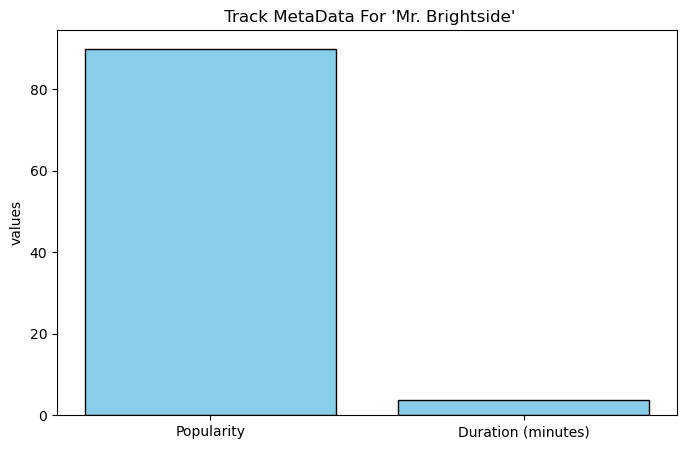

In [57]:
features = ["Popularity","Duration (minutes)"]
values = [track_data["Popularity"],track_data["Duration (minutes)"]]

plt.figure(figsize=(8,5))
plt.bar(features,values,color="skyblue",edgecolor="black")
plt.title(f" Track MetaData For '{track_data["Track Name"]}'")
plt.ylabel("values")
plt.show()

#### ***MYSQL Queries***

In [24]:
import mysql.connector
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root"
)
mycursor =db.cursor()
mycursor.execute("CREATE DATABASE spotipy_db")

In [28]:
import mysql.connector
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database = "spotipy_db"
)
mycursor = db.cursor()
mycursor.execute("""
     CREATE TABLE IF NOT EXISTS spotipy_tracks (
     id INT AUTO_INCREMENT PRIMARY KEY,
     track_name varchar(255),
     artist varchar(255),
     album varchar(255),
     popularity int,
     duration_minutes float
     
     )
""") 
print("done")

done


In [42]:
import mysql.connector

db_config = {
    "host": "localhost",
    "user": "root",
    "password": "root",
    "database": "spotipy_db"
}

connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()


In [48]:
import mysql.connector
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database = "spotipy_db"
)
mycursor = db.cursor()
mycursor.execute("""
     CREATE TABLE IF NOT EXISTS spotipy_tracks (
     id INT AUTO_INCREMENT PRIMARY KEY,
     track_name varchar(255),
     artist varchar(255),
     album varchar(255),
     popularity int,
     duration_minutes float
     
     )
""")
insert_query =  """
INSERT INTO spotipy_tracks (track_name,artist,album,popularity,duration_minutes) 
VALUES(%s,%s,%s,%s,%s)
"""
cursor.execute(insert_query,(
    track_data["Track Name"],
    track_data["Artist"],
    track_data["Album"],
    track_data["Popularity"],
    track_data["Duration (minutes)"]    
))
connection.commit()
print(f"Track '{track_data['Track Name']}' by {track_data['Artist']} inserted into the database.")
cursor.close()
connection.close()

Track 'Mr. Brightside' by The Killers inserted into the database.


In [54]:
import mysql.connector
db=mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database = "spotipy_db"
)
mycursor = db.cursor()
sql = "select * from spotipy_tracks"
mycursor.execute(sql) 
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 'Mr. Brightside', 'The Killers', 'Hot Fuss', 90, 3.71622)


## ***MYSQL QUERIES AND USING MANY URL FILE FOR TO ANALYSE***

In [62]:
import re
import mysql.connector
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# ----------- Spotify API Auth -----------
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="bdc6836598bd4cea933f1ed34e8808f0",
    client_secret = "33c47aea8d29466abf4d1c40166ea44b",
    
))

# ----------- MySQL Database Config -----------
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "root",  # use your own MySQL password
    "database": "spotipy_db"
}

# ----------- Connect to MySQL -----------
connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

# ----------- Create Table if Not Exists -----------
cursor.execute("""
CREATE TABLE IF NOT EXISTS spotify_tracks (
    id INT AUTO_INCREMENT PRIMARY KEY,
    track_name VARCHAR(255),
    artist VARCHAR(255),
    album VARCHAR(255),
    popularity INT,
    duration_minutes FLOAT
)
""")
connection.commit()

# ----------- Read URLs from File -----------
file_path = "URL.txt"
with open(file_path, 'r') as file:
    track_urls = file.readlines()

# ----------- Process Each URL -----------
for track_url in track_urls:
    track_url = track_url.strip()

    try:
        # Skip non-track URLs
        match = re.search(r'track/([a-zA-Z0-9]+)', track_url)
        if not match:
            raise ValueError("Not a valid Spotify track URL")

        track_id = match.group(1)

        # Fetch data from Spotify
        track = sp.track(track_id)

        # Prepare data
        track_data = {
            'Track Name': track['name'],
            'Artist': track['artists'][0]['name'],
            'Album': track['album']['name'],
            'Popularity': track['popularity'],
            'Duration (minutes)': round(track['duration_ms'] / 60000, 2)
        }

        # Insert into MySQL
        insert_query = """
        INSERT INTO spotify_tracks (track_name, artist, album, popularity, duration_minutes)
        VALUES (%s, %s, %s, %s, %s)
        """
        cursor.execute(insert_query, (
            track_data['Track Name'],
            track_data['Artist'],
            track_data['Album'],
            track_data['Popularity'],
            track_data['Duration (minutes)']
        ))
        connection.commit()

        print(f"✅ Inserted: {track_data['Track Name']} by {track_data['Artist']}")

    except Exception as e:
        print(f"❌ Error processing URL: {track_url}, Error: {e}")

# ----------- Close Connection -----------
cursor.close()
connection.close()
print("\n✅ All valid tracks have been processed and inserted.")


✅ Inserted: Munbe Vaa by A.R. Rahman
❌ Error processing URL: https://open.spotify.com/album/1hqxdOOQtLnoqoh1tL36Y6, Error: Not a valid Spotify track URL
❌ Error processing URL: https://open.spotify.com/album/2l86Y48TxWBYmDpUhZQttR, Error: Not a valid Spotify track URL
✅ Inserted: Nee Otha Sollu Sollu by Vijay Antony

✅ All valid tracks have been processed and inserted.


### ***Analysing The Code***

In [66]:
import mysql.connector
db=mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database = "spotipy_db"
)
mycursor = db.cursor()
sql = "select * from spotify_tracks"
mycursor.execute(sql) 
result = mycursor.fetchall()
for row in result:
    print(row)

(1, 'Munbe Vaa', 'A.R. Rahman', 'Silunu Oru Kadhal', 0, 5.95)
(2, 'Nee Otha Sollu Sollu', 'Vijay Antony', 'Aval Peyar Tamilarasi (Original Motion Picture Soundtrack)', 49, 4.82)


In [5]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="spotipy_db"
)

mycursor = db.cursor()
sql = "SELECT track_name, artist, album, popularity FROM spotify_tracks ORDER BY popularity DESC LIMIT 1;"
mycursor.execute(sql)

result = mycursor.fetchall()

for x in result:
    print(x)


('Nee Otha Sollu Sollu', 'Vijay Antony', 'Aval Peyar Tamilarasi (Original Motion Picture Soundtrack)', 49)


In [7]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="spotipy_db"
)

mycursor = db.cursor()
sql = "SELECT AVG(popularity) AS average_popularity FROM spotify_tracks;"
mycursor.execute(sql)

result = mycursor.fetchall()

for x in result:
    print(x)


(Decimal('24.5000'),)


In [9]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="spotipy_db"
)

mycursor = db.cursor()
sql = "SELECT track_name, artist, duration_minutes FROM spotify_tracks WHERE duration_minutes > 4.0;"
mycursor.execute(sql)

result = mycursor.fetchall()

for x in result:
    print(x)


('Munbe Vaa', 'A.R. Rahman', 5.95)
('Nee Otha Sollu Sollu', 'Vijay Antony', 4.82)


In [15]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="spotipy_db"
)

mycursor = db.cursor()

sql = """
SELECT 
    CASE  
        WHEN popularity >= 80 THEN 'Very Popular' 
        WHEN popularity >= 50 THEN 'Popular' 
        ELSE 'Less Popular'
    END AS popularity_range, 
    COUNT(*) AS track_count
FROM spotify_tracks 
GROUP BY popularity_range;
"""

mycursor.execute(sql)
result = mycursor.fetchall()

for row in result:
    print(row)


('Less Popular', 2)
